In [2]:
from DatasetHandler.BiwiBrowser import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Using Theano backend.


In [3]:
num_datasets = 24
num_outputs = 3
timesteps = None # 1 # 
overlapping = False

In [4]:
#biwi = readBIWIDataset(subjectList = [s for s in range(1, num_datasets+1)], timesteps = timesteps, overlapping = overlapping)
biwiAnnos = readBIWI_AnnosAsMatrix(subjectList = [s for s in range(1, num_datasets+1)])
biwiAnnos = [a for a in biwiAnnos]

In [5]:
subjectIDs = ['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'F03', 'M09', 'M10', 'F05', 'M11', 'M12', 'F02', 'M01', 'M13', 'M14']

In [6]:
subjectList = [1, 2, 3, 4, 5, 7, 8, 11, 12, 14] # except 9, for testing and [6, 13, 10, ]

In [9]:
trainingAnnos = [biwiAnnos[i-1] for i in subjectList]
trainingIDs = [subjectIDs[i-1] for i in subjectList]

In [34]:
def drawPlots(labelSets, subjectIDs, sets = None, num_cols = 3, cs = 0):
    colors = ['r', 'b', 'g']
    titles = ['Pitch', 'Yaw', 'Roll']
    red = (1.0, 0.95, 0.95)
    blue = (0.95, 0.95, 1.0)
    if sets == None: sets = [i for i in range(len(labelSets))]
    f, rows = plt.subplots(len(labelSets), num_cols, sharey=True,  sharex=True,figsize=(21, 4*len(labelSets)))
    for col in range(num_cols):
        cell = rows
        if len(labelSets) > 1: cell = rows[0][col] if num_cols > 1 else rows[0]
        cell.set_title(titles[col+cs])

    row = 0
    for labels in labelSets:
        for col in range(num_cols):
            cell = rows
            if len(labelSets) > 1: cell = rows[row][col] if num_cols > 1 else rows[row]
            cell.plot(labels[:, num_outputs+col+cs], colors[col+cs])
            cell.set_facecolor(red if 'F' in subjectIDs[row] else blue)
            cell.set_xlim([0, 1000])
            cell.set_ylim([-90, 90])
            left_cell = cell
            if len(labelSets) > 1: left_cell = rows[row][0] if num_cols > 1 else rows[row]
            left_cell.set_ylabel('Set: %d, Subj: %s, Len: %d' % (sets[row]+1, subjectIDs[row], labels.shape[0]))
        row += 1


    f.subplots_adjust(hspace=0, wspace=0)
    #plt.setp([a.get_yticklabels() for a in f.axes[1:]], visible=False)

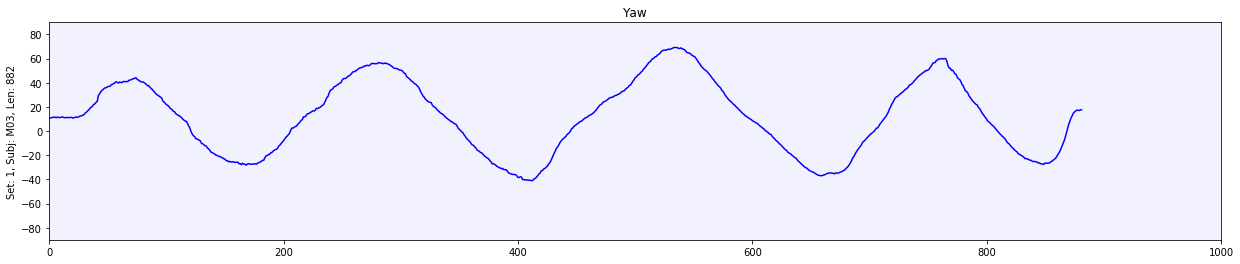

In [35]:
drawPlots([biwiAnnos[9-1]], [subjectIDs[9-1]], num_cols = 1, cs = 1)

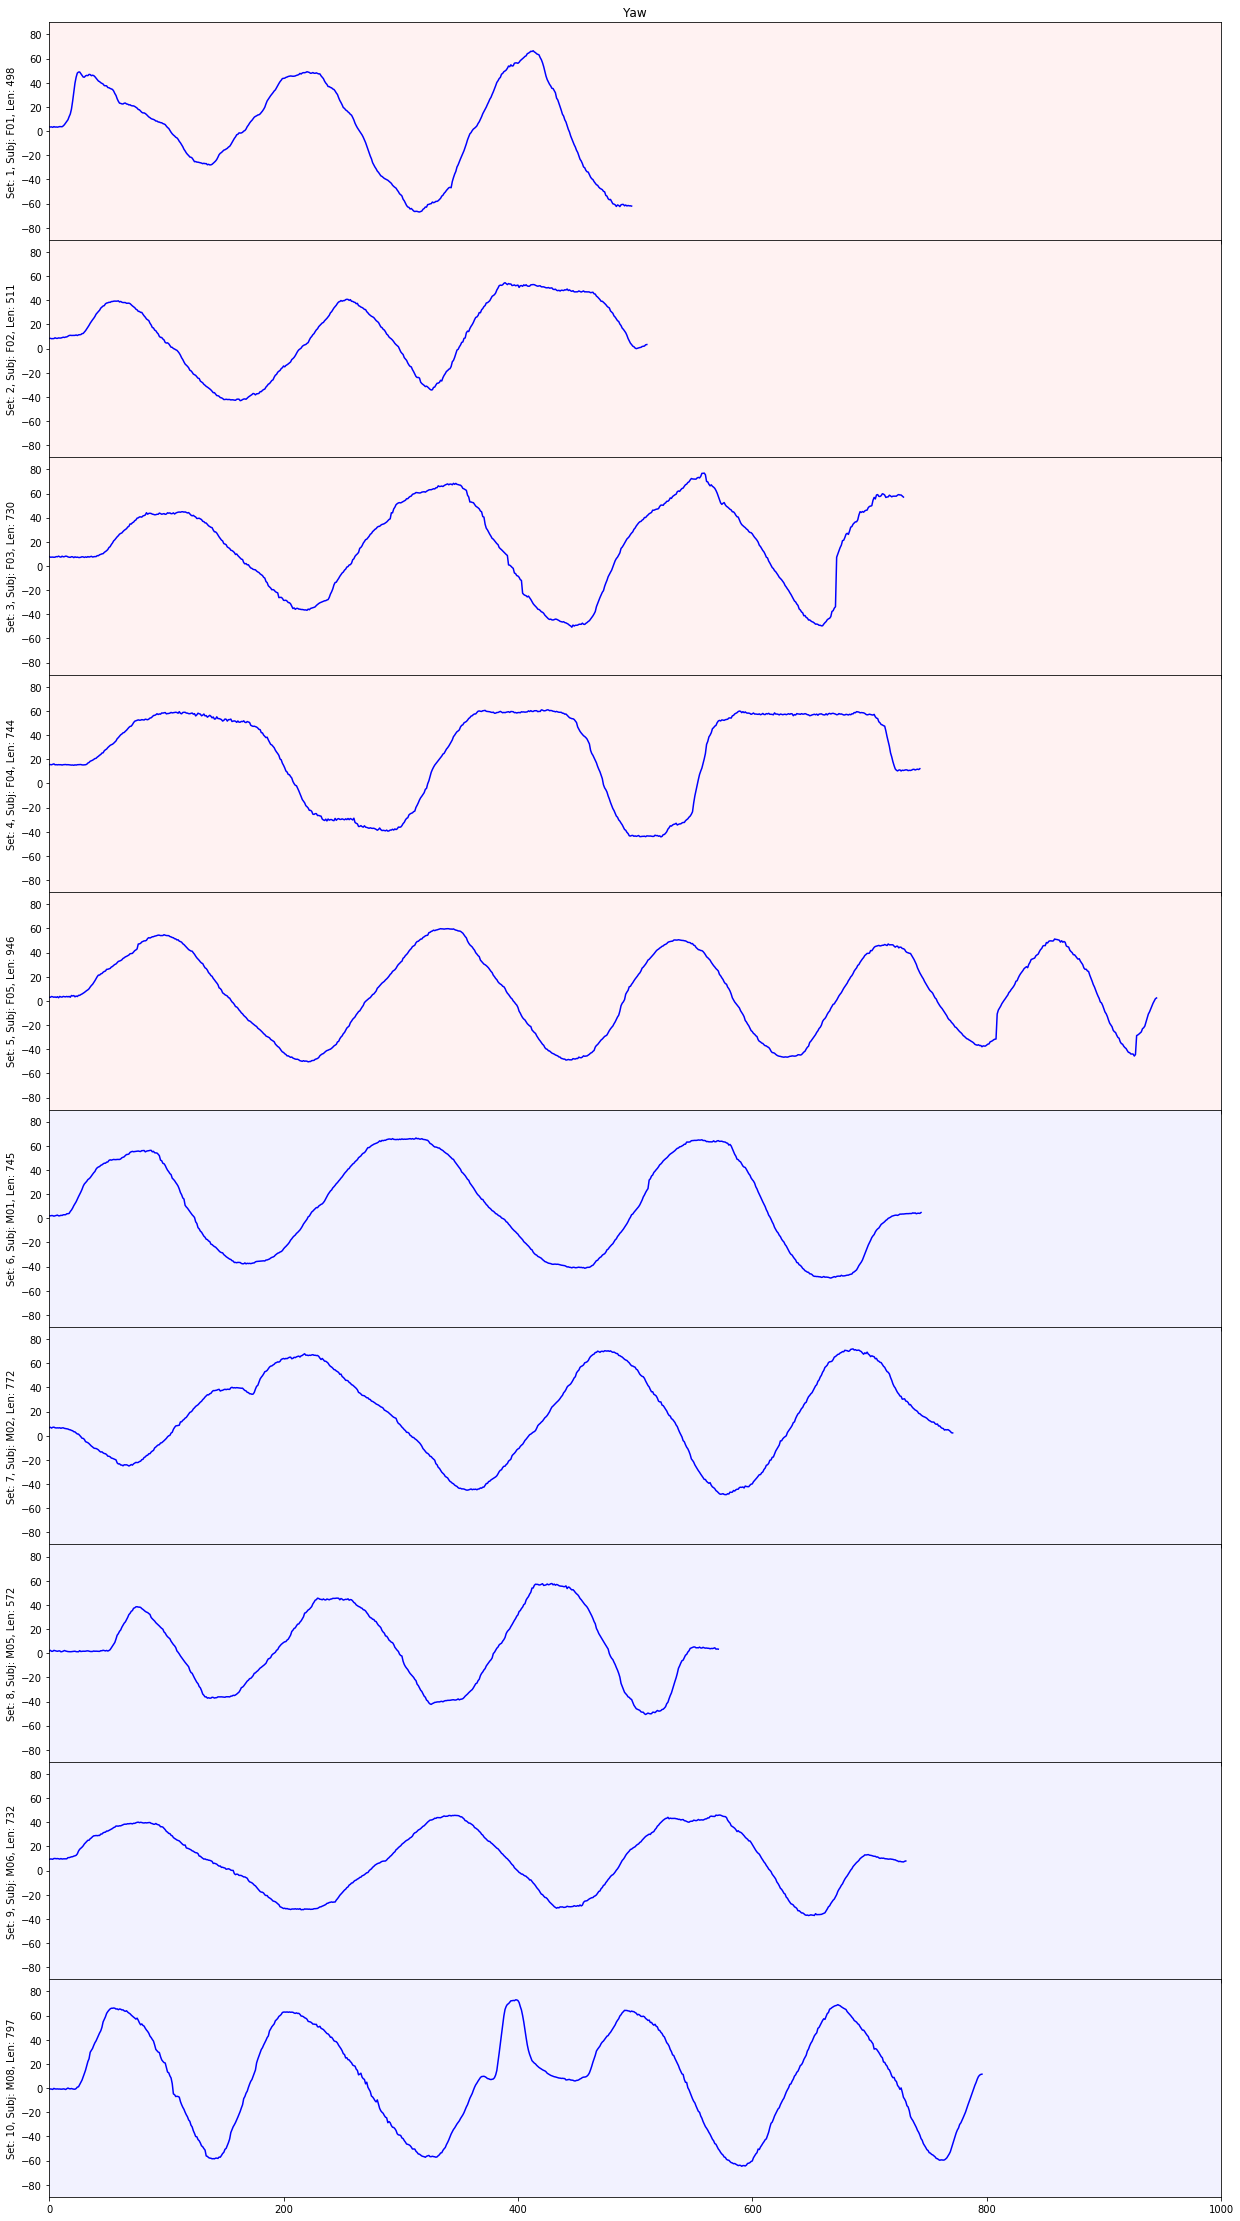

In [30]:
drawPlots(trainingAnnos, trainingIDs, num_cols = 1, cs = 1)

In [18]:
#drawPlots(biwiAnnos[:6], subjectIDs[:6])

# Useful Outputs below

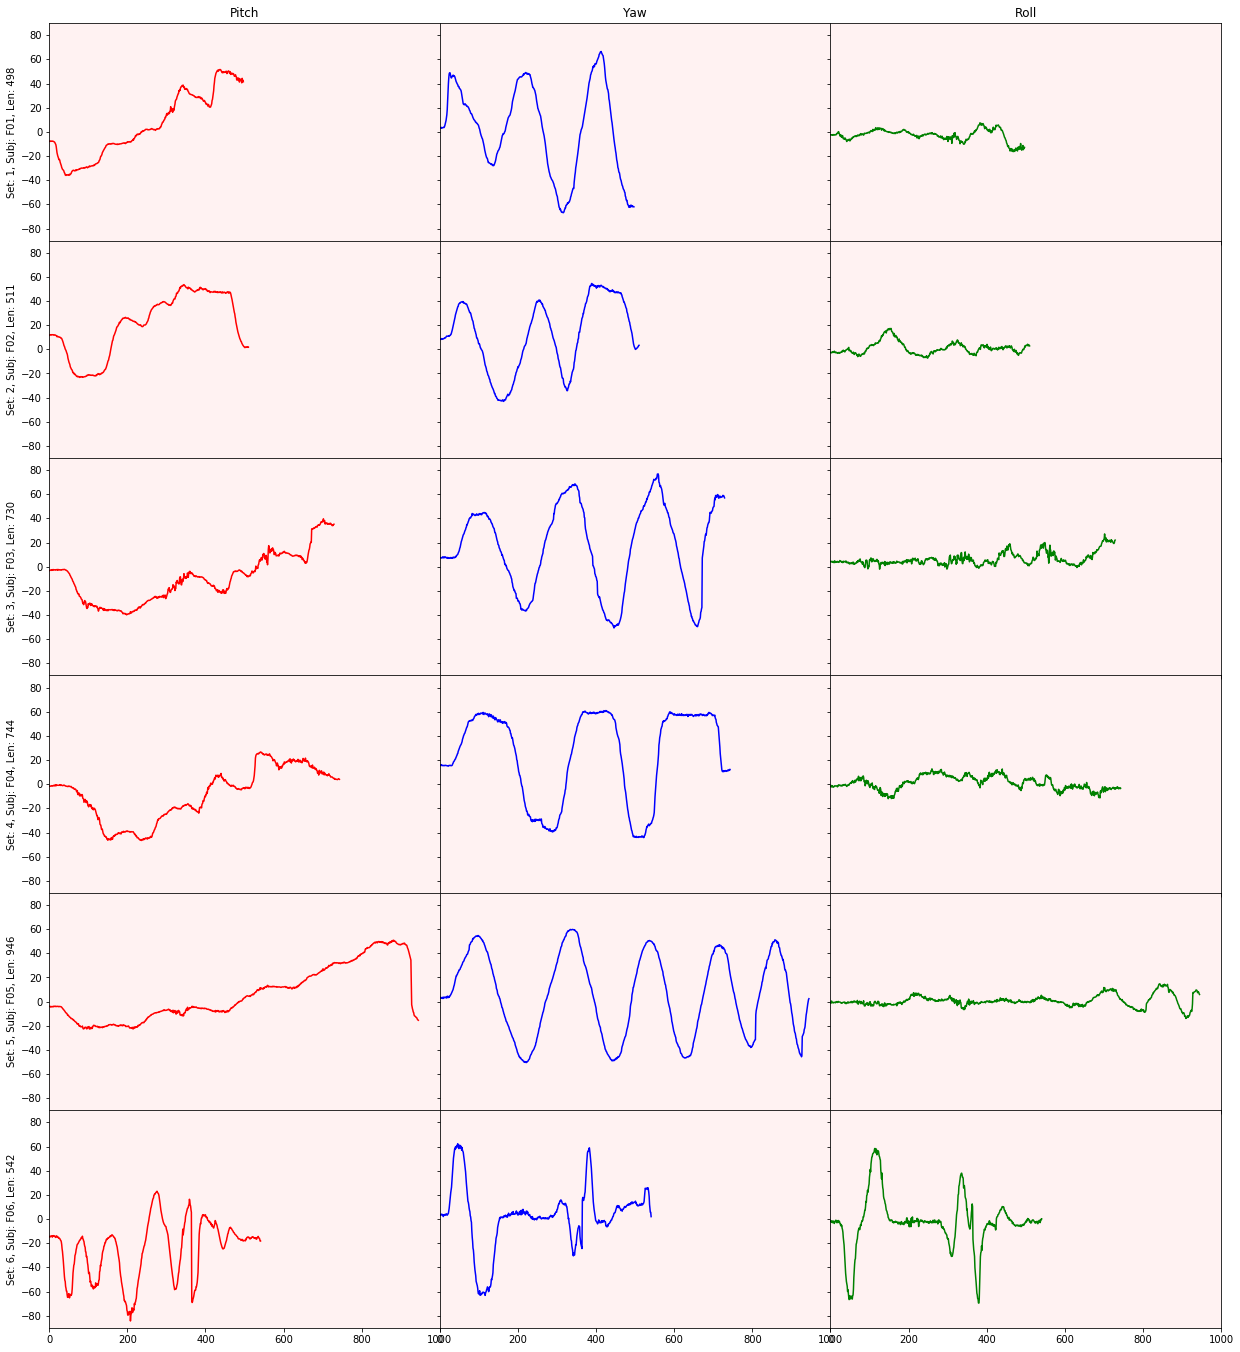

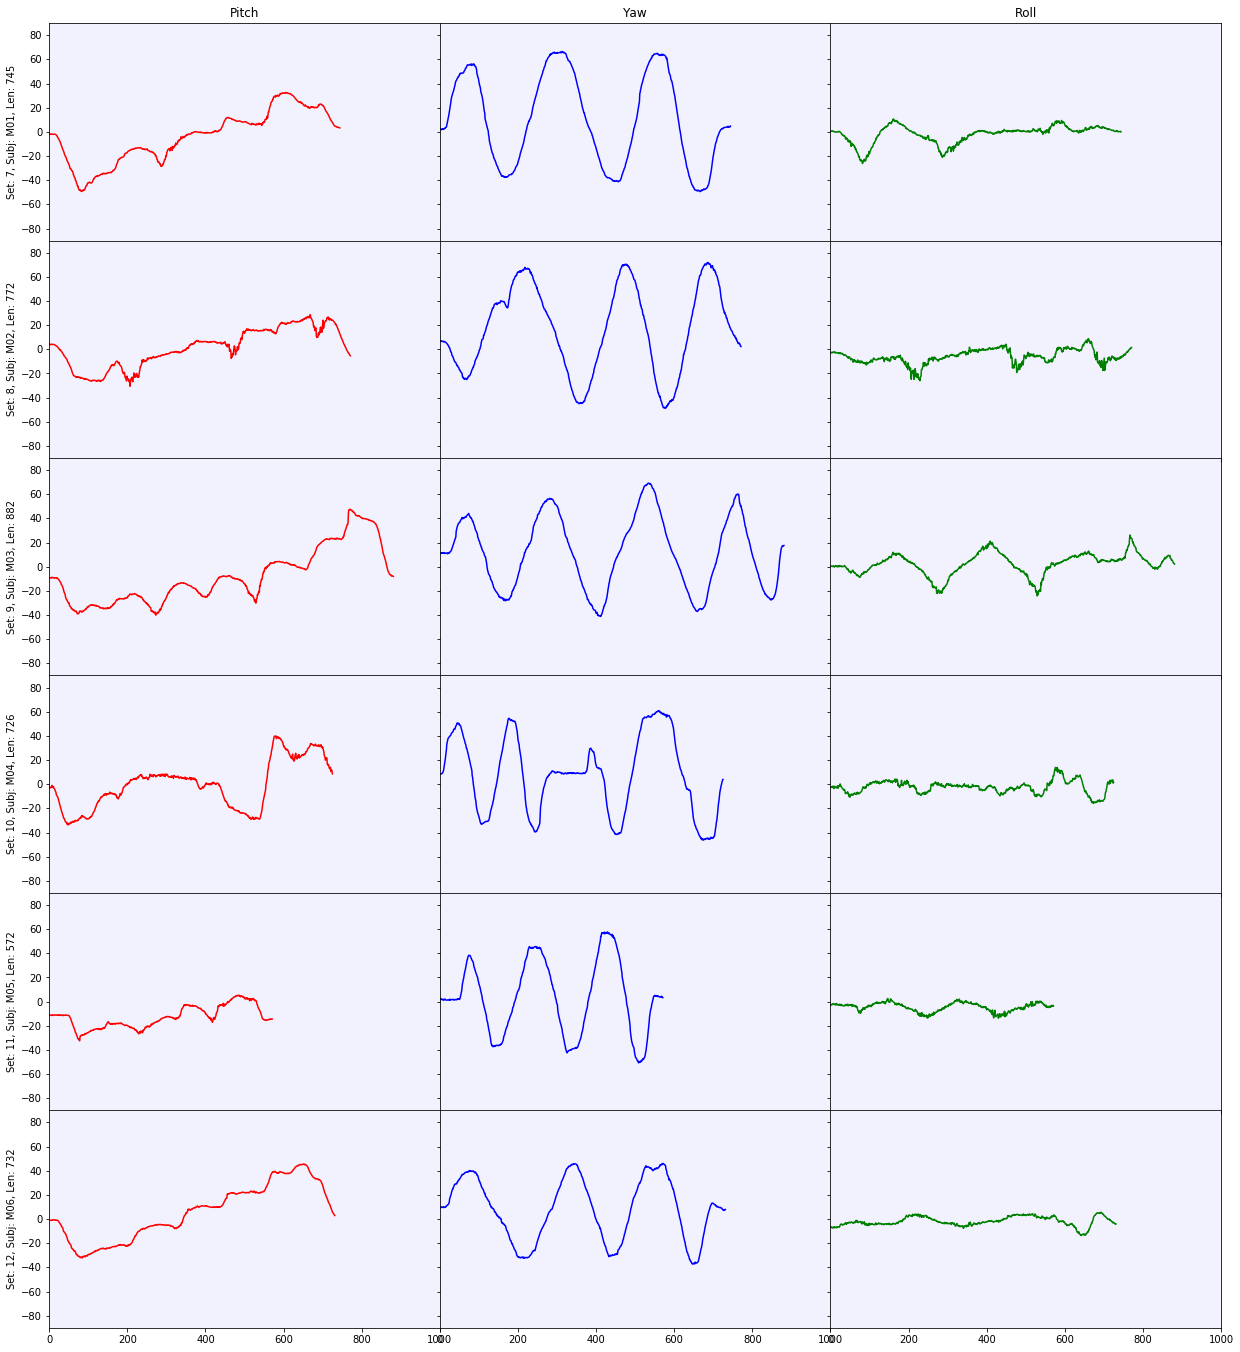

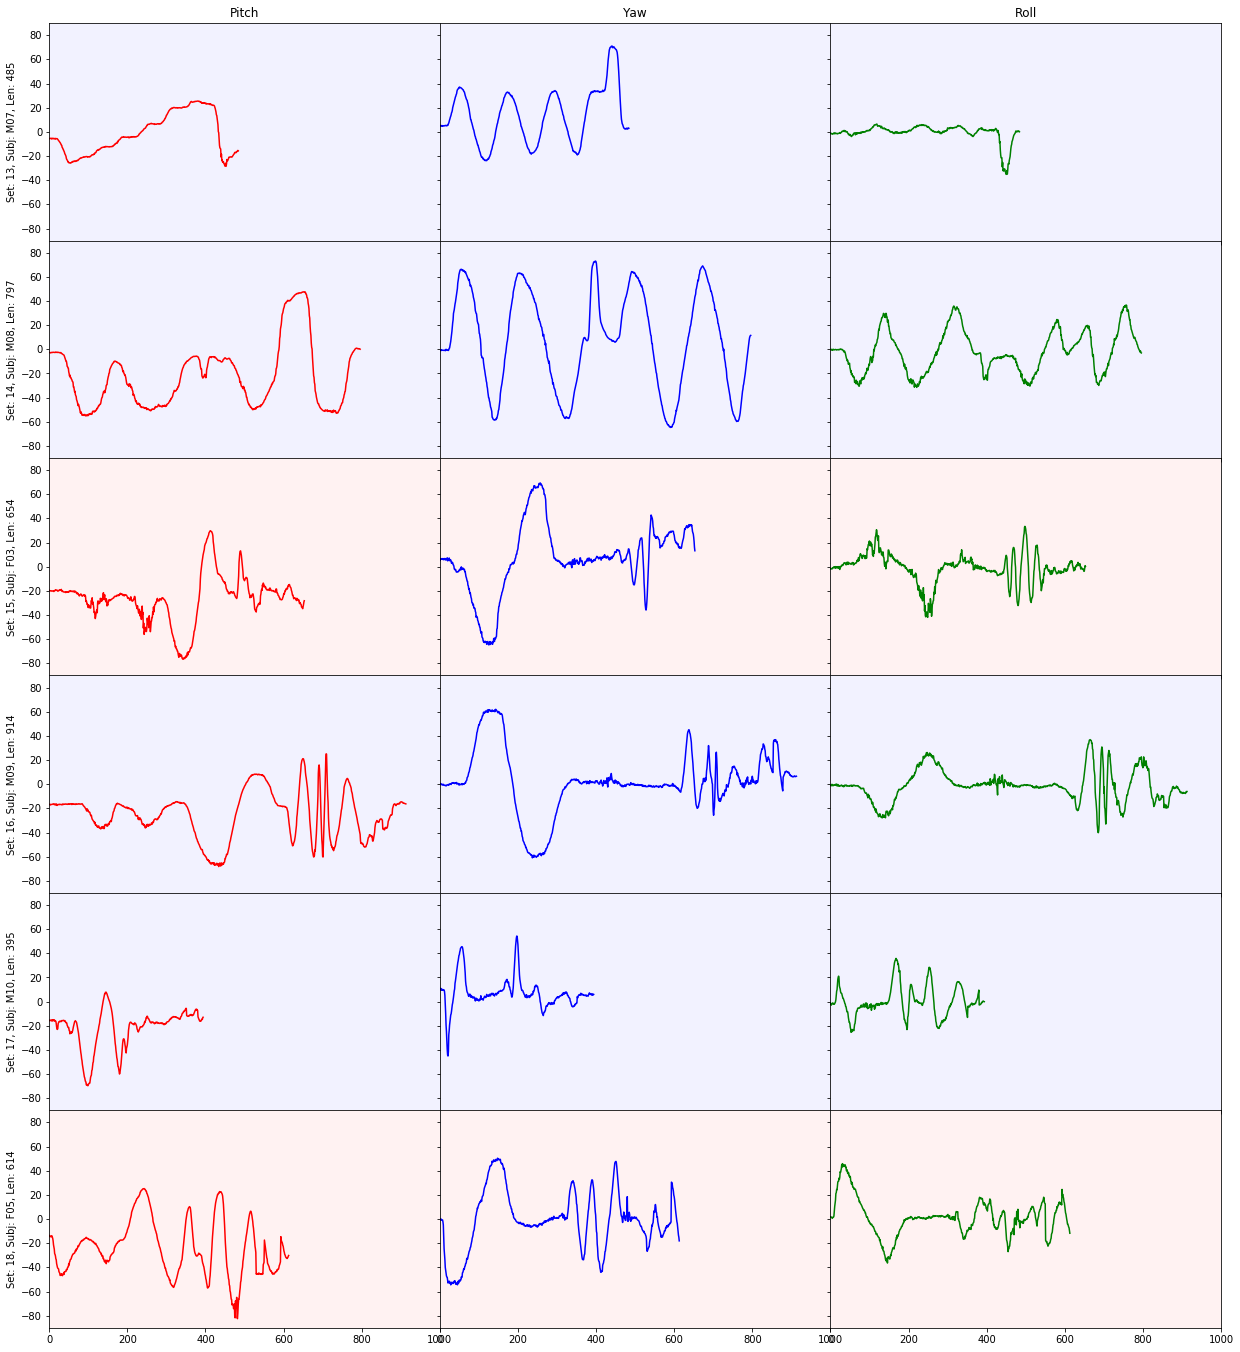

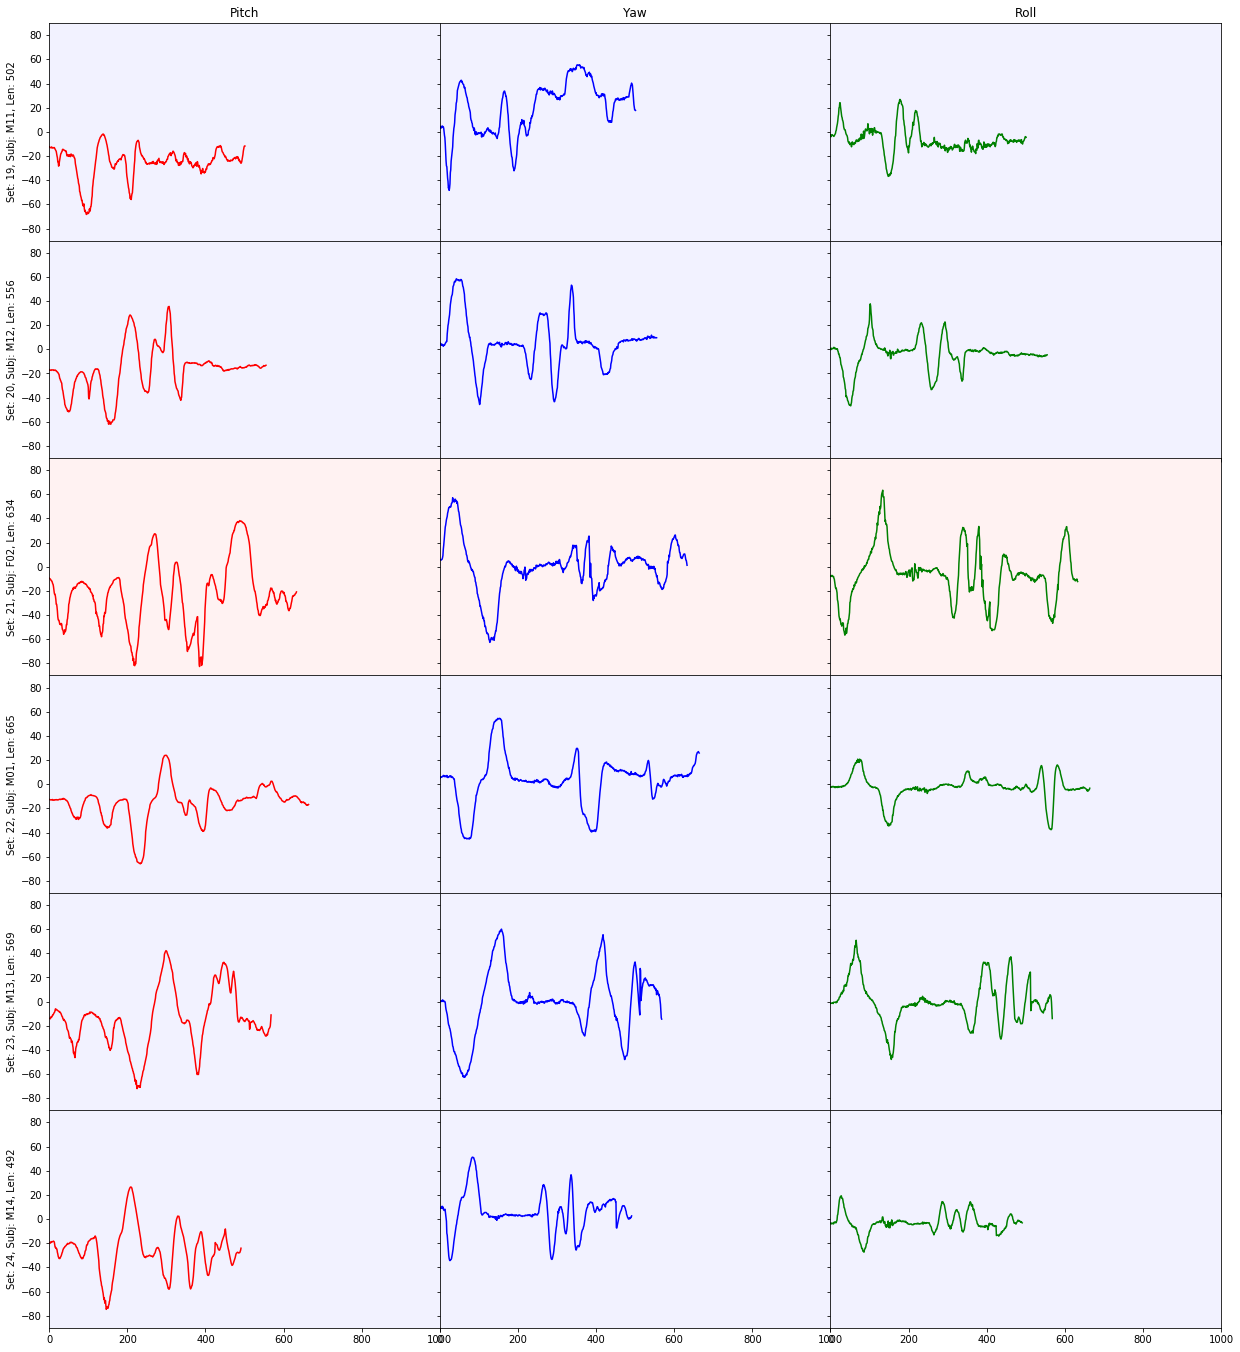

In [19]:
subLen = 6
for i in range(0, 24, subLen):
    drawPlots(biwiAnnos[i:i+subLen], subjectIDs[i:i+subLen], sets = [j for j in range(i, i+subLen)])

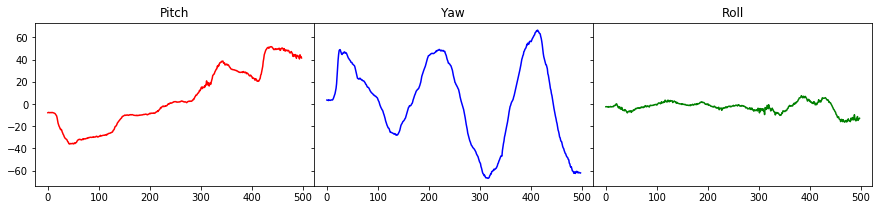

In [28]:
drawPlots(labelSets[0][:, -num_outputs:])

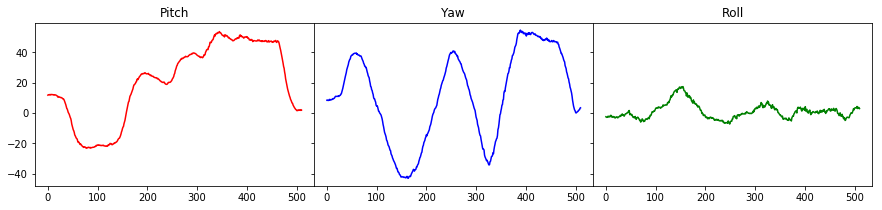

In [29]:
drawPlots(labelSets[1][:, -num_outputs:])